## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

## Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0
5    14.20        1.76  2.45  ...  1.05                          2.85   1450.0
6    14.39        1.87  2.45  ...  1.02                          3.58   1290.0
7    14.06        2.15  2.61  ...  1.06                          3.58   1295.0

[8 rows x 13 columns]

###**Задача 1.1 (0.5 балла)** 
Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [36]:
X.describe()

alcohol  malic_acid  ...  od280/od315_of_diluted_wines      proline
count  178.000000  178.000000  ...                    178.000000   178.000000
mean    13.000618    2.336348  ...                      2.611685   746.893258
std      0.811827    1.117146  ...                      0.709990   314.907474
min     11.030000    0.740000  ...                      1.270000   278.000000
25%     12.362500    1.602500  ...                      1.937500   500.500000
50%     13.050000    1.865000  ...                      2.780000   673.500000
75%     13.677500    3.082500  ...                      3.170000   985.000000
max     14.830000    5.800000  ...                      4.000000  1680.000000

[8 rows x 13 columns]

#### Вывод:
Пропуски отсутствуют, как и категориальные переменные:  совпадает количество значений и количество примеров, тип число - нулей нет.

###**Задача 1.2 (0.5 балла)** 
Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)

###**Задача 1.3 (1 балл)** 
На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

Text(0.5, 0.98, 'Распределение положительных и отрицательных кейсов по возрастам')

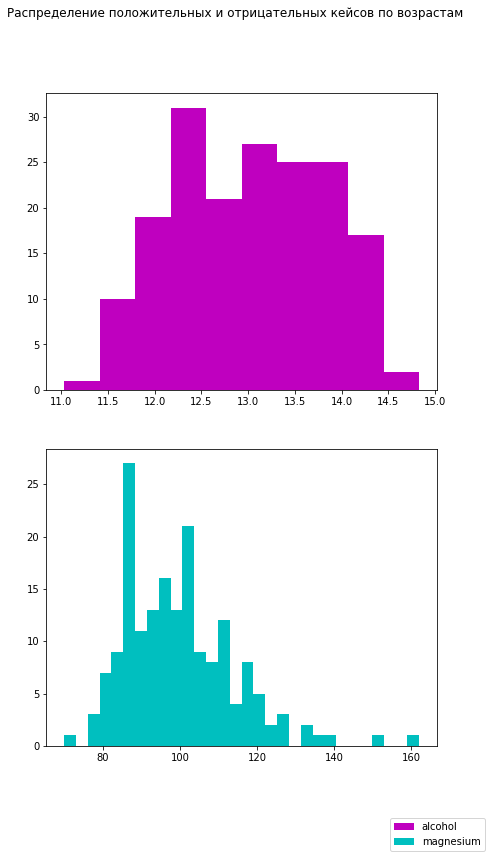

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1)
fig.set_figheight(12)
fig.set_figwidth(7)
axes[0].hist(data=X, x='alcohol', bins=10, color='m')
axes[1].hist(data=X, x='magnesium', bins=30, color='c')
fig.legend(loc='lower right')
fig.suptitle('Распределение положительных и отрицательных кейсов по возрастам')

Можно сказать, что расределение признаков, предложенных для нормализации, всёже напоминает нормальное. Используем StandartScaler:

In [40]:
from sklearn import preprocessing


normalizer = preprocessing.StandardScaler()
X_train, X_test = map(lambda x: pd.DataFrame(x, columns=X_train.columns), (normalizer.fit_transform(X_train), normalizer.fit_transform(X_test)))

In [41]:
X_train.head()

alcohol  malic_acid  ...  od280/od315_of_diluted_wines   proline
0  0.628447    1.081206  ...                     -1.070901 -0.518219
1 -0.540882   -0.612994  ...                      1.330768 -0.215063
2 -0.755657   -1.287031  ...                     -0.398434  0.041960
3  0.377877   -0.694972  ...                      0.246586  0.470333
4 -0.803385    0.388952  ...                      0.960225 -1.473819

[5 rows x 13 columns]

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [43]:
clfs = {str(n):KNeighborsClassifier(n_neighbors=n, p=2).fit(X_train[['alcohol', 'magnesium']], y_train) for n in  [1, 3, 5, 10, 15, 25]}
ans = pd.DataFrame([[n, accuracy_score(y_train, clfs[n].predict(X_train[['alcohol', 'magnesium']])), accuracy_score(y_test, clfs[n].predict(X_test[['alcohol', 'magnesium']]))] for n in clfs.keys()], columns=['NN', 'Train', 'Test'])

In [44]:
ans

NN     Train      Test
0   1  0.991935  0.722222
1   3  0.838710  0.740741
2   5  0.806452  0.740741
3  10  0.806452  0.777778
4  15  0.782258  0.777778
5  25  0.725806  0.722222

###**Задача 1.4 (0 баллов)** 
Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [45]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

###**Задача 1.5 (1 балл)** 
Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [46]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

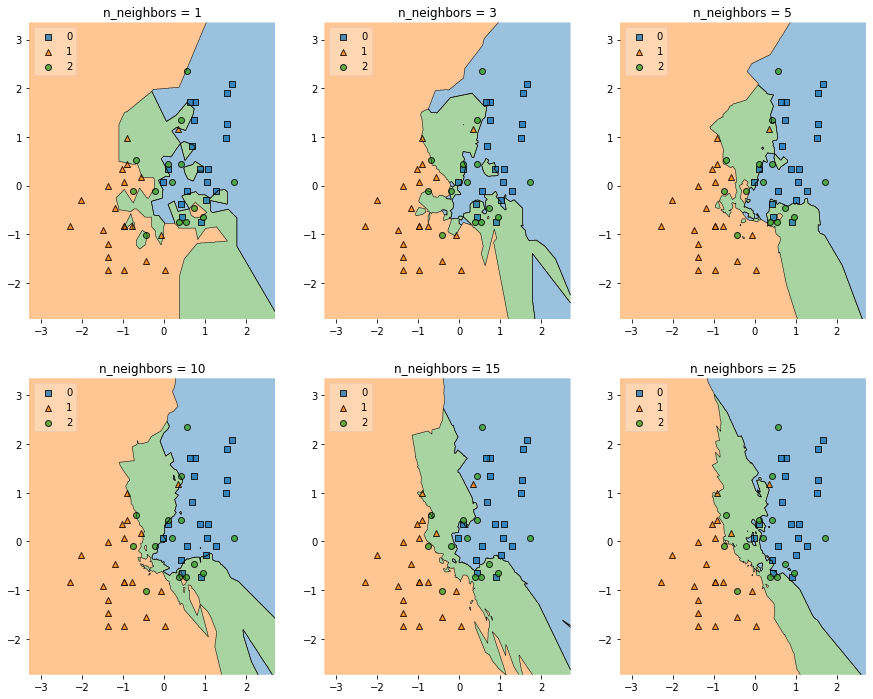

In [47]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,12))



for clf_key, grd in zip(clfs.keys(),
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_test[['alcohol', 'magnesium']]), y=y_test, clf=clfs[clf_key], legend=2)
    plt.title(f'n_neighbors = {clf_key}')



###**Задача 1.6 (0.5 балла)** 
Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

#### Вывод:
Согласно оценки качества, полученной в задаче 1.3 оптимальным является выбор 10 или 15 соседей. Что же качается графического изображения, то я бы оценивала способность модели "обобщать" знания на новые объекты по тому, насколько целостны цветные зоны, то есть ближе к выпуклому многоугольнику. С этой точки зрения более правильным кажется разделение при 15 или 25 соседях. Пересечение таким образом - 15 соседей, так что остановимся на этом числе.

## Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

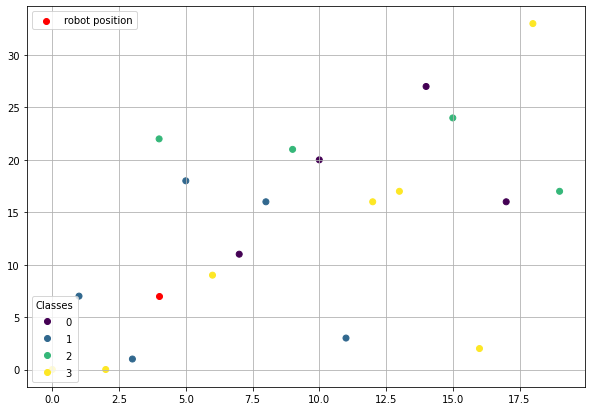

In [187]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

###**Задача 2.1 (1.5 балла)** 
Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        direction = 0 if np.random.binomial(1, 0.2) else self.knn.predict([self.trajectory[-1]])[0]
        self.trajectory.append(self.trajectory[-1] + self.mapping[direction])
        #print(self.trajectory)

In [194]:

robot = MobileRobot(k = 3, initial_position=np.array([4, 7]), landmarks=np.vstack((x, landmarks)).T, classes=random_classes) 

In [195]:
robot.move()

[array([4, 7]), array([5, 7])]


###**Задача 2.2 (0.5 балла)** 
Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [202]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    #print(traj[:, 0])
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

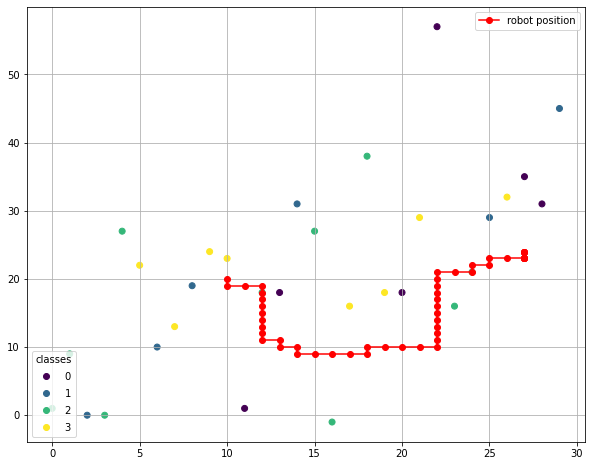

In [203]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

###**Задача 2.3 (1 балл)**
 Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

#### Вывод:
Траектория в зависимости от количества соседей очень меняется. Думаю, если бы классы были не просто назначены меткам не случайно, но метки одного класса были сгруппированы, то незначительное изменение в колличесве соседей меньше бы влияло на траекторию, так как меньше бы менялось соотношение соседей благодаря "кучкованию".

In [206]:
n_neighbors = np.random.randint(1, 20, size = 4)

Text(0.5, 1.0, '9 neighbors')

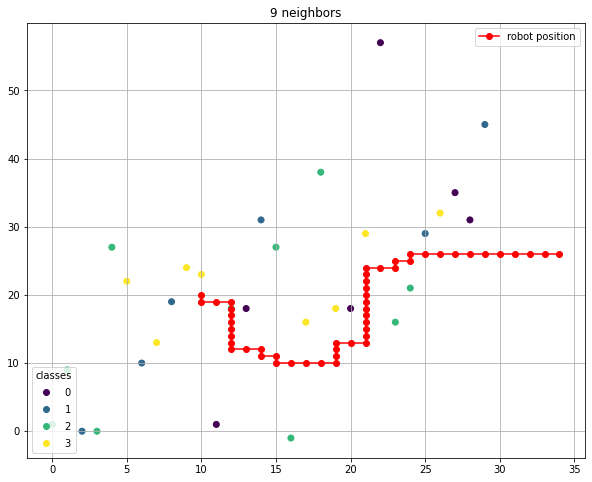

In [211]:
conduct_experiment(x, mean = 3, std = 10, k = n_neighbors[0], n_movements = 50)
plt.title(f'{n_neighbors[0]} neighbors')

Text(0.5, 1.0, '12 neighbors')

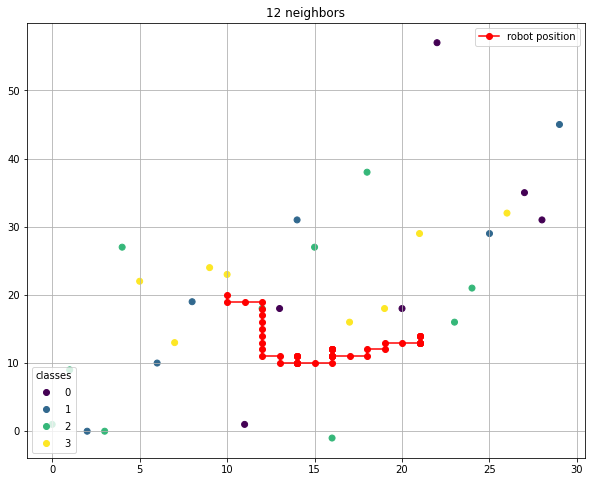

In [214]:
conduct_experiment(x, mean = 3, std = 10, k = n_neighbors[1], n_movements = 50)
plt.title(f'{n_neighbors[1]} neighbors')

Text(0.5, 1.0, '2 neighbors')

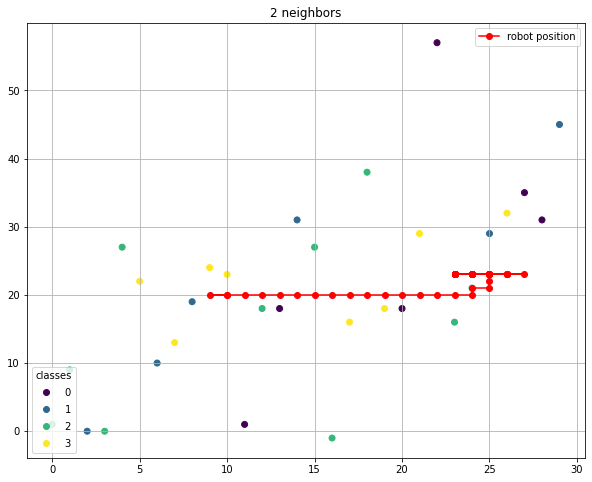

In [213]:
conduct_experiment(x, mean = 3, std = 10, k = n_neighbors[2], n_movements = 50)
plt.title(f'{n_neighbors[2]} neighbors')

Text(0.5, 1.0, '1 neighbors')

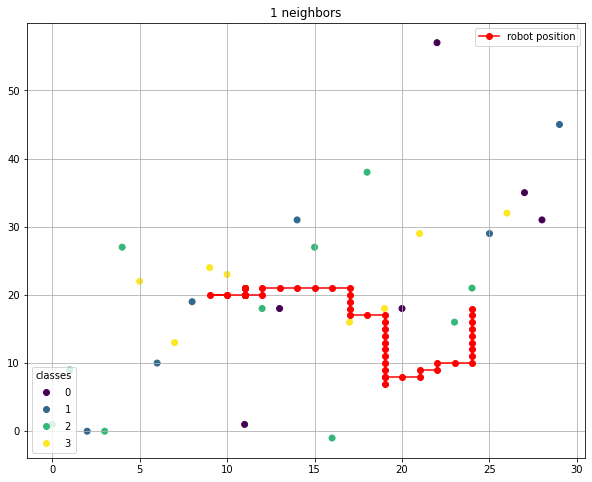

In [212]:
conduct_experiment(x, mean = 3, std = 10, k = n_neighbors[3], n_movements = 50)
plt.title(f'{n_neighbors[3]} neighbors')

## Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [51]:
brill_data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv", sep=",")
brill_data.head(5)

Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0    335  4.34  4.35  2.75

[5 rows x 11 columns]

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

###**Задача 3.1 (0.1 балла)** 
Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [52]:
brill_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [53]:
brill_data.describe()

Unnamed: 0         carat  ...             y             z
count  53940.000000  53940.000000  ...  53940.000000  53940.000000
mean   26970.500000      0.797940  ...      5.734526      3.538734
std    15571.281097      0.474011  ...      1.142135      0.705699
min        1.000000      0.200000  ...      0.000000      0.000000
25%    13485.750000      0.400000  ...      4.720000      2.910000
50%    26970.500000      0.700000  ...      5.710000      3.530000
75%    40455.250000      1.040000  ...      6.540000      4.040000
max    53940.000000      5.010000  ...     58.900000     31.800000

[8 rows x 8 columns]

###**Задача 3.2 (0.1 балла)** 
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [54]:
brill_data.drop(['Unnamed: 0'], axis=1, inplace=True)

###**Задача 3.3 (0.1 балла)**
 Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

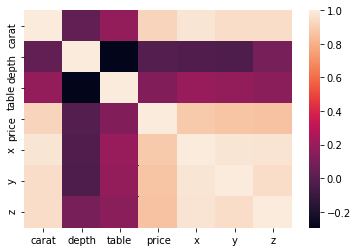

In [57]:
import seaborn as sns

sns.heatmap(brill_data.corr())

#### Вывод:
Больше всего цена камня скоррелирована с колличесивом карат, чуть слабее с каждым из размеров. Это вполне соответствует здравому смыслу: ценность камня, как известно, напрямую зависит от колличества карат и чистоты, а масса - от размеров, но, видимо, каждое конкретное измерение может быть "компенсировано" скромностью других.

### **Задача 3.4 (0.1 балла)** 
Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [58]:
data = pd.get_dummies(brill_data, columns=brill_data.select_dtypes('object').columns.values)

In [59]:
data

carat  depth  table  ...  clarity_VS2  clarity_VVS1  clarity_VVS2
0       0.23   61.5   55.0  ...            0             0             0
1       0.21   59.8   61.0  ...            0             0             0
2       0.23   56.9   65.0  ...            0             0             0
3       0.29   62.4   58.0  ...            1             0             0
4       0.31   63.3   58.0  ...            0             0             0
...      ...    ...    ...  ...          ...           ...           ...
53935   0.72   60.8   57.0  ...            0             0             0
53936   0.72   63.1   55.0  ...            0             0             0
53937   0.70   62.8   60.0  ...            0             0             0
53938   0.86   61.0   58.0  ...            0             0             0
53939   0.75   62.2   55.0  ...            0             0             0

[53940 rows x 27 columns]

###**Задача 3.5 (0.2 балла)** 
Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [60]:
X_train, X_test, y_train, y_test =  train_test_split(data.drop('price', axis=1), data['price'], test_size=0.3, random_state=42)

###**Задача 3.6 (0.3 балла)** 
Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [61]:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
X_train, X_test = map(lambda x: pd.DataFrame(x, columns=X_train.columns), (normalizer.fit_transform(X_train), normalizer.fit_transform(X_test)))

###**Задача 3.7 (0.2 балла)** 
Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [112]:
reg = LinearRegression().fit(X_train, y_train)
print(f'MSE на тренировочной выборке : {"{:,.0f}".format(mean_squared_error(y_train, reg.predict(X_train)))}')
print(f'MSE на тестовой выборке : {"{:,.0f}".format(mean_squared_error(y_test, reg.predict(X_test)))}')

MSE на тренировочной выборке : 1,290,542
MSE на тестовой выборке : 1,250,580


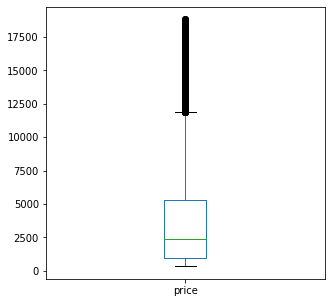

In [130]:
fig = plt.figure(figsize=(5, 5))
brill_data['price'].plot(kind='box')


#### Комментарий
Ошибка кажктся очень большой, но как видно у нас много выбросов, так что для MSE - это ожидаемо.

###**Задача 3.8 (0.2 балла)** 
Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [64]:
pd.DataFrame(data=reg.coef_, index=pd.Index(X_train.columns.values, name='Feature'), columns=['Coef']).sort_values(by=['Coef'])

Coef
Feature                   
x             -1100.418850
clarity_SI2    -491.478784
clarity_I1     -473.825710
color_J        -387.497828
color_I        -251.210002
clarity_SI1    -146.575938
color_H        -130.497542
cut_Fair       -125.711003
depth           -90.173817
table           -60.332280
cut_Good        -41.395989
z               -34.258945
y                -6.458917
cut_Very Good     1.370807
cut_Premium      16.464741
cut_Ideal        51.992206
color_G          56.166467
clarity_VS2     102.180310
color_F         139.770235
color_E         162.482671
clarity_VS1     202.574923
color_D         211.310541
clarity_IF      244.223357
clarity_VVS1    253.972938
clarity_VVS2    271.780476
carat          5338.615671

#### Вывод:
Самый большой по модулю коэффициент у признака carat, меньше его примерно в 5 раза x.

###**Задача 3.9 (0.4 балла)** 
Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [65]:
from sklearn import linear_model

In [66]:
reg_ridge = linear_model.Ridge(alpha=10).fit(X_train, y_train)
reg_lasso = linear_model.Lasso(alpha=10).fit(X_train, y_train)
pd.DataFrame(data=zip(reg.coef_, reg_ridge.coef_, reg_lasso.coef_), index=pd.Index(X_train.columns.values, name='Feature'), columns=['-', 'L1', 'L2'])

-           L1           L2
Feature                                             
carat          5338.615671  5301.289062  4872.156396
depth           -90.173817   -87.639805   -57.093610
table           -60.332280   -60.123686   -47.684857
x             -1100.418850 -1057.228888  -652.157442
y                -6.458917    -9.605149    -0.000000
z               -34.258945   -38.071544   -43.265361
cut_Fair       -125.711003  -125.880000  -126.504261
cut_Good        -41.395989   -41.480355   -42.809322
cut_Ideal        51.992206    51.969036    41.695815
cut_Premium      16.464741    16.449545     0.000000
cut_Very Good     1.370807     1.540331    -0.000000
color_D         211.310541   211.055842   147.949340
color_E         162.482671   162.246931    92.663224
color_F         139.770235   139.296135    69.139360
color_G          56.166467    55.907287    -0.000000
color_H        -130.497542  -130.202420  -172.359463
color_I        -251.210002  -250.581034  -279.014577
color_J        -387.497828  -386.751101  -403.030698
clarity_I1     -473.825710  -473.321397  -488.727300
clarity_IF      244.223357   244.575156   194.053302
clarity_SI1    -146.575938  -147.096586  -252.335665
clarity_SI2    -491.478784  -491.313752  -573.635637
clarity_VS1     202.574923   202.359351   101.298254
clarity_VS2     102.180310   102.000447    -0.000000
clarity_VVS1    253.972938   254.446988   187.499263
clarity_VVS2    271.780476   272.034475   193.997152

###**Задача 3.10 (0.4 балла)**
 Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249820229.42967224, tolerance: 60605526.52466702
  positive)


Text(0.5, 1.0, 'Lasso Regression')

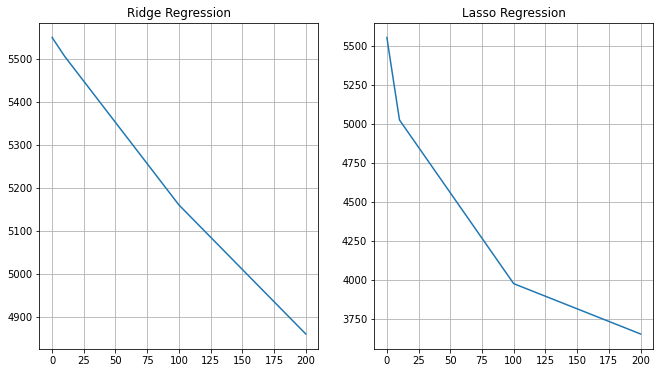

In [67]:
alphas = np.array([0.1, 1, 10, 100, 200])

fig, axes = plt.subplots(1, 2, figsize=(11, 6))
axes[0].plot(alphas, [np.linalg.norm(linear_model.Ridge(alpha=a).fit(X_train, y_train).coef_) for a in alphas])
axes[1].plot(alphas, [np.linalg.norm(linear_model.Lasso(alpha=a).fit(X_train, y_train).coef_) for a in alphas])

axes[0].grid()
axes[0].set_title('Ridge Regression')
axes[1].grid()
axes[1].set_title('Lasso Regression')

#### Вывод:
Действеннее веса уменьшает Lasso-регрессия, в частности она, как правило, вовсе зануляет отдельные веса. Таким образом, признаки, при которых веса стали нулевыми можно исключить из рассмотрения, так как они больше не вносят вклад. 

###**Задача 3.11 (0.5 балла)**
 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [127]:
reg_lasso_cv = linear_model.LassoCV(cv=5, alphas=alphas, random_state=42).fit(X_train, y_train)
Alphas_MMSE = pd.DataFrame(reg_lasso_cv.mse_path_.mean(axis=1), index=pd.Index(reg_lasso_cv.alphas_, name='alpha'), columns=['MMSE'])

Alphas_MMSE.style.format('{:,.0f}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499002729.9194336, tolerance: 48476565.465277866
  tol, rng, random, positive)


In [74]:
Alphas_MMSE['MMSE'].idxmin()

1.0

#### Вывод:
Наименьшая усдеднённая MSE для $ \alpha = 1 $

### **Задача 3.12 (0.5 балла)**
 Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [128]:
#opt_alpha = Alphas_MMSE['MMSE'].idxmin()
opt_alpha = 1


reg_lasso_opt = linear_model.Lasso(alpha=opt_alpha).fit(X_train, y_train)
pd.DataFrame(data=reg_lasso_opt.coef_, index=pd.Index(X_train.columns.values, name='Feature'), columns=['Coef']).sort_values(by=['Coef'])

Coef
Feature                   
x             -1057.146202
clarity_SI2    -581.952401
clarity_I1     -500.712378
color_J        -416.666793
color_I        -291.248361
clarity_SI1    -251.396264
color_H        -179.684332
cut_Fair       -131.510814
depth           -86.839987
table           -59.035308
cut_Good        -51.211156
z               -35.456798
cut_Very Good   -12.731587
y                -4.229951
clarity_VS2      -0.000000
color_G          -0.000000
cut_Premium       0.000000
cut_Ideal        34.465779
color_F          85.245889
color_E         107.725663
clarity_VS1     113.804669
color_D         163.994062
clarity_VVS1    192.087171
clarity_IF      200.011451
clarity_VVS2    200.267577
carat          5292.355926

#### Вывод:
Нааимение информативными модель сочла признаки clarity_VS2, color_G, cut_Premium. Это по одному из конкретных значений категориальных признаков, возможно, дело в том, что модель может определить их методом исключения по неактивности остальных значений этого признака.

###**Задача 3.13 (0.4 балла)** 
Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [129]:
data = [[mean_squared_error(y_test, reg.predict(X_test)), reg.score(X=X_test, y=y_test)], [mean_squared_error(y_test, reg_lasso_opt.predict(X_test)), reg_lasso_opt.score(X=X_test, y=y_test)]]
df = pd.DataFrame(data=data, index=pd.Index(['3.7 Regression', 'Lasso Regression'], name='Model'), columns=['MSE', 'R^2 Score']) 
df.style.format({'MSE':'{:,.0f}', 'R^2 Score':'{:,.8f}'})

In [ ]:
data = [[mean_squared_error(y_test, reg.predict(X_test)), score(X=X_test, y=y_test)], [mean_squared_error(y_test, reg_lasso_opt.predict(X_test)), reg_lasso_opt.score(X=X_test, y=y_test)]]
df = pd.DataFrame(data=data, index=pd.Index(['3.7 Regression', 'Lasso Regression'], name='Model'), columns=['MSE', 'R^2 Score']) 
df.style.format({'MSE':'{:,.0f}', 'R^2 Score':'{:,.8f}'})

#### Вывод:
Ошибка регрессии Lasso несколько меньше, (так же как $R^2-score$  ближе к единице), причём она использует. меньше признаков, так что я бы выбрала её.